# Generating Sine 

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense

2023-07-24 11:40:28.643798: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


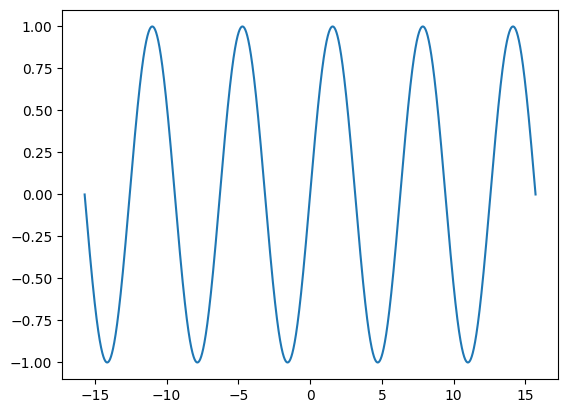

In [11]:
rng = np.random.RandomState(34)

# perfectly spaced samples of sine, no noise
num_samples = 10000
x = np.linspace(-5*np.pi, 5*np.pi, num_samples)
column_x = x[:, np.newaxis] # This just formats the data property for Tensorflow.

y = np.sin(x)

plt.plot(x, y)

# Making the first model for sine

In [16]:
model = Sequential([
    Dense(units=500, activation='relu', input_shape=(1,)),
    Dense(units=250, activation='relu'),
    Dense(units=125, activation='relu'),
    Dense(units=1, activation='linear')
])
model.compile(optimizer="adam", loss='mse')

model.fit(column_x, y, batch_size=200, epochs=50, verbose=True)



Epoch 1/50
50/50 [==============================] - 1s 4ms/step - loss: 0.5171
Epoch 2/50
50/50 [==============================] - 0s 4ms/step - loss: 0.4776
Epoch 3/50
50/50 [==============================] - 0s 4ms/step - loss: 0.4125
Epoch 4/50
50/50 [==============================] - 0s 4ms/step - loss: 0.3612
Epoch 5/50
50/50 [==============================] - 0s 4ms/step - loss: 0.3528
Epoch 6/50
50/50 [==============================] - 0s 4ms/step - loss: 0.3350
Epoch 7/50
50/50 [==============================] - 0s 4ms/step - loss: 0.3216
Epoch 8/50
50/50 [==============================] - 0s 4ms/step - loss: 0.3041
Epoch 9/50
50/50 [==============================] - 0s 4ms/step - loss: 0.2956
Epoch 10/50
50/50 [==============================] - 0s 3ms/step - loss: 0.2779
Epoch 11/50
50/50 [==============================] - 0s 3ms/step - loss: 0.2593
Epoch 12/50
50/50 [==============================] - 0s 4ms/step - loss: 0.2314
Epoch 13/50
50/50 [==============================

313/313 [==============================] - 0s 1ms/step


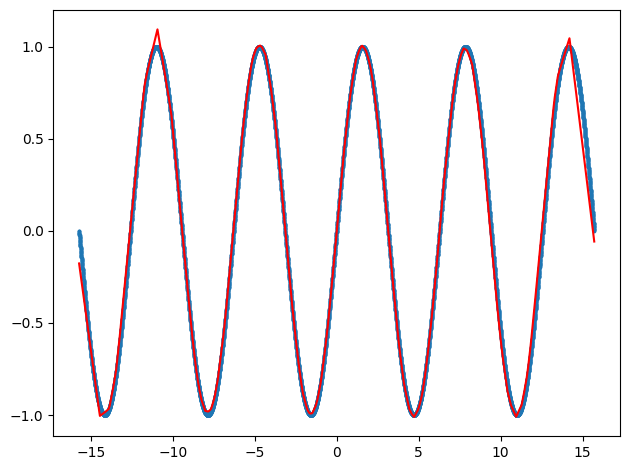

In [17]:
yfit = model.predict(x)
plt.plot(x, yfit, color='red')
plt.scatter(x, y, s=3)

plt.tight_layout()        
plt.show()

625/625 [==============================] - 1s 1ms/step


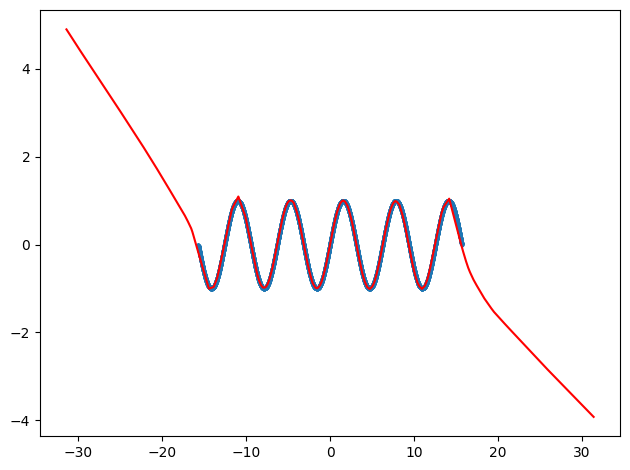

In [18]:
x_extended = np.linspace(-10*np.pi, 10*np.pi, num_samples*2)

yfit = model.predict(x_extended)
plt.plot(x_extended, yfit, color='red')
plt.scatter(x, y, s=3)

plt.tight_layout()        
plt.show()

# Making sine with holes in the middle

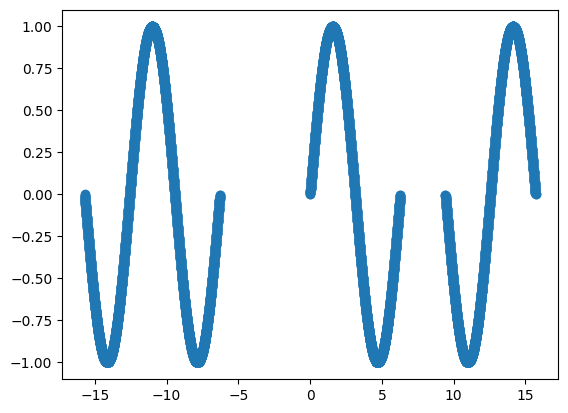

In [26]:
rng = np.random.RandomState(777)

# perfectly spaced samples of sine, no noise
num_samples = 10000
x_holes = np.linspace(-5*np.pi, 5*np.pi, num_samples)

# Filter out 2 sections
x_holes = x_holes[(x_holes < -2*np.pi) | (x_holes > 0)]
x_holes = x_holes[(x_holes < 2*np.pi) | (x_holes > 3*np.pi)]
column_x_holes = x_holes[:, np.newaxis] # This just formats the data property for Tensorflow.

y_holes = np.sin(x_holes)

plt.scatter(x_holes, y_holes)

In [27]:
model = Sequential([
    Dense(units=500, activation='relu', input_shape=(1,)),
    Dense(units=250, activation='relu'),
    Dense(units=125, activation='relu'),
    Dense(units=1, activation='linear')
])
model.compile(optimizer="adam", loss='mse')

model.fit(column_x_holes, y_holes, batch_size=200, epochs=50, verbose=True)

Epoch 1/50
35/35 [==============================] - 1s 5ms/step - loss: 0.5621
Epoch 2/50
35/35 [==============================] - 0s 5ms/step - loss: 0.4802
Epoch 3/50
35/35 [==============================] - 0s 4ms/step - loss: 0.4383
Epoch 4/50
35/35 [==============================] - 0s 4ms/step - loss: 0.3761
Epoch 5/50
35/35 [==============================] - 0s 4ms/step - loss: 0.3280
Epoch 6/50
35/35 [==============================] - 0s 4ms/step - loss: 0.2901
Epoch 7/50
35/35 [==============================] - 0s 4ms/step - loss: 0.2889
Epoch 8/50
35/35 [==============================] - 0s 4ms/step - loss: 0.2820
Epoch 9/50
35/35 [==============================] - 0s 4ms/step - loss: 0.2686
Epoch 10/50
35/35 [==============================] - 0s 4ms/step - loss: 0.2592
Epoch 11/50
35/35 [==============================] - 0s 4ms/step - loss: 0.2487
Epoch 12/50
35/35 [==============================] - 0s 4ms/step - loss: 0.2266
Epoch 13/50
35/35 [==============================

625/625 [==============================] - 1s 2ms/step


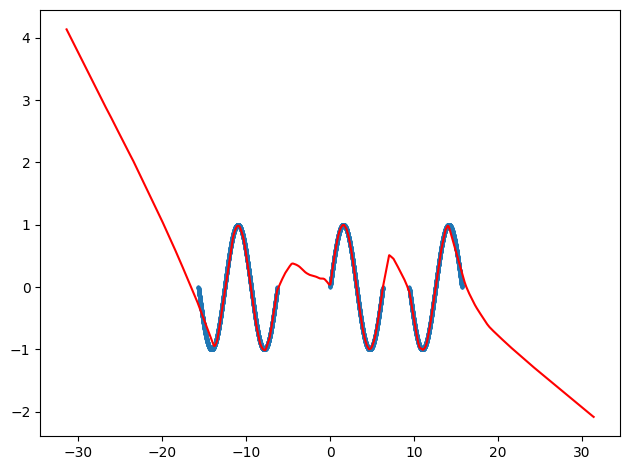

In [28]:
x_extended = np.linspace(-10*np.pi, 10*np.pi, num_samples*2)

yfit = model.predict(x_extended)
plt.plot(x_extended, yfit, color='red')
plt.scatter(x_holes, y_holes, s=3)

plt.tight_layout()        
plt.show()

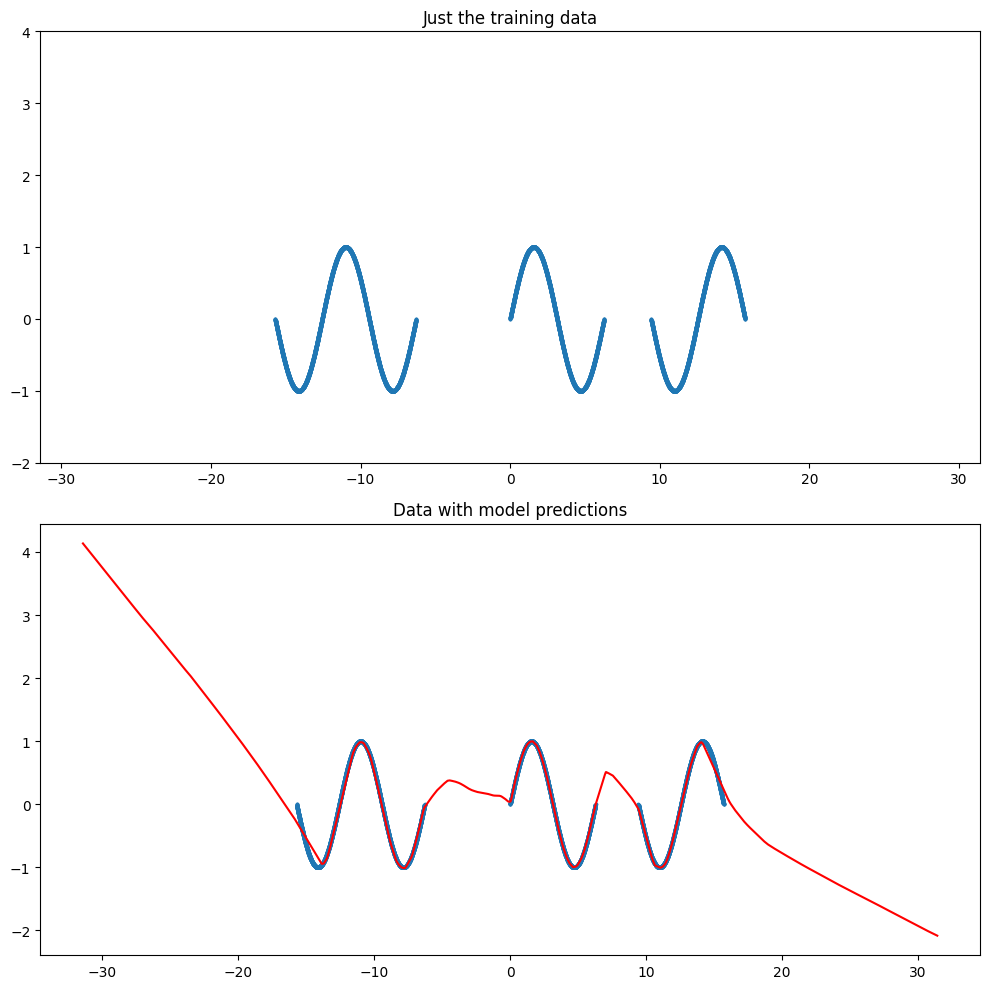

In [35]:
# Just putting the two plots side by side
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(2, 1, 1)
ax.set_title('Just the training data')
ax.scatter(x_holes, y_holes, s=3)
ax.set_xlim([-10*np.pi, 10*np.pi])
ax.set_ylim([-2, 4])

ax = fig.add_subplot(2, 1, 2)
ax.set_title('Data with model predictions')
ax.plot(x_extended, yfit, color='red')
ax.scatter(x_holes, y_holes, s=3)

plt.tight_layout()        
plt.show()